In [1]:
import sys
sys.path.append("..")
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from emojime.utils import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
data_path = '../data'
emotions = ['neutral', 'happy', 'sad', 'fear', 'angry']
data = np.load('../data/data_set.npy')

In [3]:
X = data[:,:-1]
y = data[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test);

In [5]:
svm = SVC()
y_pred = svm.fit(X_train, y_train).predict(X_test)

/Users/oscar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


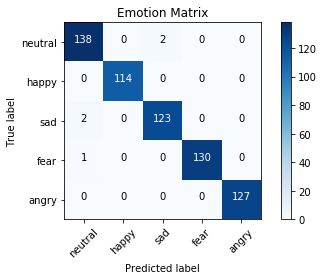

In [6]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=emotions, title='Emotion Matrix')
plt.show()

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

svm = SVC()
svm.fit(X, y)

/Users/oscar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
pickle.dump(svm, open('../models/svm_emotion_classifier', 'wb'))
pickle.dump(scaler, open('../models/emotion_scaler', 'wb'))

In [9]:
# rand_selection = [random.randint(0, images.shape[0]-1) for i in range(4)]
# fig, axs = plt.subplots(1, 4, figsize=(20, 20), sharey=True)
# for i, selection in enumerate(rand_selection):
#     axs[i].imshow(images[selection], cmap='Greys_r')
#     axs[i].set_title(labels[image_labels[selection]])